<a href="https://colab.research.google.com/github/CESINHAFX/Ambiente-Skills-Network/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_noteDETECTIONANOMALY_FINANCIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

anomaly_dectection_for_financial_path = kagglehub.competition_download('anomaly-dectection-for-financial')

print('Data source import complete.')
print(f'The data is located at: {anomaly_dectection_for_financial_path}')

100%|██████████| 19.0k/19.0k [00:00<00:00, 5.97MB/s]

Extracting files...
Data source import complete.
The data is located at: /root/.cache/kagglehub/competitions/anomaly-dectection-for-financial


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd

# Carregar os dados
train_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/train_data.xlsx')
test_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/test_data.xlsx')

# Visualizar as primeiras linhas do conjunto de treino
print("Train data head:")
display(train_data.head())

# Mostrar os tipos de dados das colunas
print("\nData types in train data:")
print(train_data.dtypes)

# Verificar valores nulos
print("\nMissing values in train data:")
print(train_data.isnull().sum())

# Estatísticas descritivas para features numéricas
print("\nStatistical summary of numerical features:")
print(train_data.describe())

# Distribuição das classes (Anomaly_label)
print("\nDistribution of target variable 'Anomaly_label':")
print(train_data['Anomaly_label'].value_counts(normalize=True))

Train data head:


,time,company,fund,IRR,W_Avg,Reduction,Vision,Opt_Pw,KPIs,Bus_Int,...,Out_Exp,Cus_Exp,FA_Opt,Digi_Trans,Del_Acct,Lead_Own,Lead_Own_old,id,Anomaly_label,id.1
0,2021-06-30,N,MEF III,0.137468,2.60,0.10,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,2021-12-31,H,MEF IV,-0.017164,2.15,0.20,1,0,0,0,...,0,0,0,0,0,0.0,0.0,1,1,1
2,2020-06-30,Ps,MEF III,0.110791,2.10,-0.30,1,1,0,0,...,0,0,0,0,0,0.0,NaN,2,1,2
3,2020-12-31,Y,MEF III,0.214054,3.25,0.10,1,0,0,0,...,0,0,0,1,0,1.0,0.0,3,1,3
4,2021-03-31,F,MEF III,0.478961,3.40,0.25,0,0,0,0,...,0,0,0,1,0,0.0,0.0,4,0,4



Data types in train data:
time             datetime64[ns]
company                  object
fund                     object
IRR                     float64
W_Avg                   float64
Reduction               float64
Vision                    int64
Opt_Pw                    int64
KPIs                      int64
Bus_Int                   int64
Gen_Bt                    int64
Mgt_HR                    int64
Org_Being                 int64
Emp_Per                   int64
Cor_Gov                   int64
Out_Exp                   int64
Cus_Exp                   int64
FA_Opt                    int64
Digi_Trans                int64
Del_Acct                  int64
Lead_Own                float64
Lead_Own_old            float64
id                        int64
Anomaly_label             int64
id.1                      int64
dtype: object

Missing values in train data:
time              0
company           0
fund              0
IRR               0
W_Avg             0
Reduction         0
Vision  

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score

# Carregar dados
train_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/train_data.xlsx')
test_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/test_data.xlsx')

# Ordenar dados pelo tempo
train_data = train_data.sort_values('time').reset_index(drop=True)
test_data = test_data.sort_values('time').reset_index(drop=True)

# Definir colunas
categorical_cols = ['company', 'fund']
drop_cols = ['id', 'id.1', 'time']
target_col = 'Anomaly_label'

numerical_cols = train_data.drop(columns=drop_cols + categorical_cols + [target_col]).columns.tolist()

# Pré-processamento
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Função para treinar e avaliar modelos
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{model.__class__.__name__} Macro F1-score: {f1:.4f}")
    return pipeline

In [ ]:
# Separar features e target
X_train = train_data.drop(columns=[col for col in drop_cols + [target_col] if col in train_data.columns])
y_train = train_data[target_col]

# Handle the case where target_col might not be in test_data
test_drop_cols = [col for col in drop_cols if col in test_data.columns]
if target_col in test_data.columns:
    test_drop_cols.append(target_col)

X_test = test_data.drop(columns=test_drop_cols)


# Modelos a testar
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    SVC(random_state=42, class_weight='balanced', probability=True),
    HistGradientBoostingClassifier(random_state=42)
]

# Se o conjunto de teste tiver rótulos, você pode avaliar:
if target_col in test_data.columns:
    y_test = test_data[target_col]
else:
    y_test = None

# Treinar e avaliar cada modelo
trained_pipelines = {}
for model in models:
    if y_test is not None:
        pipeline = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    else:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipeline.fit(X_train, y_train)
        print(f"{model.__class__.__name__} treinado com sucesso.")
    trained_pipelines[model.__class__.__name__] = pipeline

RandomForestClassifier treinado com sucesso.
LogisticRegression treinado com sucesso.
SVC treinado com sucesso.
HistGradientBoostingClassifier treinado com sucesso.


In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Separar features e target (adicionado para corrigir o NameError)
X_train = train_data.drop(columns=[col for col in drop_cols + [target_col] if col in train_data.columns])
y_train = train_data[target_col]

# Handle the case where target_col might not be in test_data
test_drop_cols = [col for col in drop_cols if col in test_data.columns]
if target_col in test_data.columns:
    test_drop_cols.append(target_col)
X_test = test_data.drop(columns=test_drop_cols)

# Se o conjunto de teste tiver rótulos, você pode avaliar:
if target_col in test_data.columns:
    y_test = test_data[target_col]
else:
    y_test = None


# Usar TimeSeriesSplit para validação temporal
tscv = TimeSeriesSplit(n_splits=5)

# Exemplo: ajuste de hiperparâmetros para Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__class_weight': ['balanced']
}

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=tscv, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Melhores parâmetros RF: {grid_search_rf.best_params_}")
print(f"Melhor Macro F1 (validação temporal): {grid_search_rf.best_score_:.4f}")

# Avaliar no conjunto de teste se y_test estiver disponível
y_pred = grid_search_rf.predict(X_test)

if y_test is not None:
    print("\nRelatório de classificação no conjunto de teste:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title('Matriz de Confusão - Random Forest')
    plt.show()
else:
    print("\nSkipping test set evaluation as target variable is not available.")
    # Optionally, you could save the predictions to a file here
    # y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=['Anomaly_label'])
    # y_pred_df.to_csv('test_predictions.csv')

Melhores parâmetros RF: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__n_estimators': 50}
Melhor Macro F1 (validação temporal): 0.6740

Skipping test set evaluation as target variable is not available.


RandomForestClassifier treinado com sucesso.
LogisticRegression treinado com sucesso.
SVC treinado com sucesso.
HistGradientBoostingClassifier treinado com sucesso.


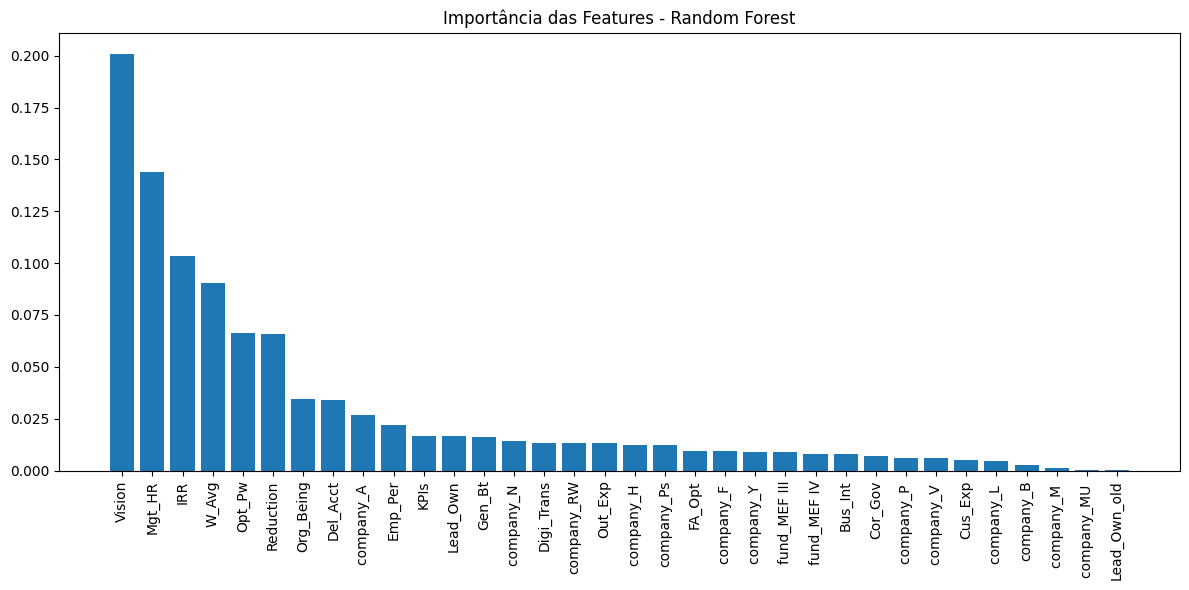

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score

# Carregar dados (garantir que train_data e test_data estão disponíveis)
train_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/train_data.xlsx')
test_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/test_data.xlsx')

# Ordenar dados pelo tempo
train_data = train_data.sort_values('time').reset_index(drop=True)
test_data = test_data.sort_values('time').reset_index(drop=True)

# Definir colunas (garantir que as definições de colunas estão disponíveis)
categorical_cols = ['company', 'fund']
drop_cols = ['id', 'id.1', 'time']
target_col = 'Anomaly_label'
numerical_cols = train_data.drop(columns=drop_cols + categorical_cols + [target_col]).columns.tolist()

# Pré-processamento (garantir que o preprocessor está definido)
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Separar features e target (incluído do cell -2NWo2RVrdfF)
X_train = train_data.drop(columns=[col for col in drop_cols + [target_col] if col in train_data.columns])
y_train = train_data[target_col]

# Handle the case where target_col might not be in test_data
test_drop_cols = [col for col in drop_cols if col in test_data.columns]
if target_col in test_data.columns:
    test_drop_cols.append(target_col)
X_test = test_data.drop(columns=test_drop_cols)

# Se o conjunto de teste tiver rótulos, você pode avaliar:
if target_col in test_data.columns:
    y_test = test_data[target_col]
else:
    y_test = None

# Modelos a testar (incluído do cell -2NWo2RVrdfF)
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    SVC(random_state=42, class_weight='balanced', probability=True),
    HistGradientBoostingClassifier(random_state=42)
]

# Treinar e avaliar cada modelo (incluído do cell -2NWo2RVrdfF)
trained_pipelines = {}
# Função para treinar e avaliar modelos (necessária para a chamada abaixo, incluída do cell PVE81S3ptepo)
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    # A avaliação no conjunto de teste só ocorre se y_test estiver disponível
    if y_test is not None:
        y_pred = pipeline.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='macro')
        print(f"{model.__class__.__name__} Macro F1-score: {f1:.4f}")
    else:
        print(f"{model.__class__.__name__} treinado com sucesso.")
    return pipeline

for model in models:
    # A avaliação no conjunto de teste só ocorre se y_test estiver disponível
    if y_test is not None:
        pipeline = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    else:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipeline.fit(X_train, y_train)
        print(f"{model.__class__.__name__} treinado com sucesso.")
    trained_pipelines[model.__class__.__name__] = pipeline


# Obter importâncias das features do pipeline
model_rf = trained_pipelines['RandomForestClassifier'].named_steps['classifier']
# Recriar features_cat para garantir que está disponível
features_cat = trained_pipelines['RandomForestClassifier'].named_steps['preprocessor'] \
    .transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_features = np.concatenate([numerical_cols, features_cat])

importances = model_rf.feature_importances_

# Plotar as importâncias
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Importância das Features - Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), all_features[indices], rotation=90)
plt.tight_layout()
plt.show()

Matriz de Correlação (valores numéricos):


,IRR,W_Avg,Reduction,Vision,Opt_Pw,KPIs,Bus_Int,Gen_Bt,Mgt_HR,Org_Being,Emp_Per,Cor_Gov,Out_Exp,Cus_Exp,FA_Opt,Digi_Trans,Del_Acct,Lead_Own,Lead_Own_old
IRR,1.000000,0.588919,-0.039709,0.005688,2.097004e-02,-0.070811,-0.004709,2.519657e-01,-0.118841,-0.174716,-0.018316,0.013123,0.014127,0.178895,-0.062132,0.161190,-0.099653,0.092742,0.208007
W_Avg,0.588919,1.000000,0.121535,0.169698,9.019983e-02,-0.072873,0.181155,1.210158e-01,-0.057488,-0.195186,0.179301,0.243081,-0.132295,0.090138,-0.211721,0.205080,0.060243,0.168992,0.068012
Reduction,-0.039709,0.121535,1.000000,-0.012308,8.615491e-02,0.102565,0.143243,1.100847e-03,0.054604,-0.149654,0.260070,-0.028718,-0.152862,-0.200477,-0.043086,0.132757,0.122047,-0.284985,-0.253034
Vision,0.005688,0.169698,-0.012308,1.000000,2.500000e-01,-0.027778,0.150756,-1.118034e-01,0.086146,0.171602,0.207670,0.111111,-0.060684,-0.114708,0.140028,0.049029,0.077876,0.370711,-0.089443
Opt_Pw,0.020970,0.090200,0.086155,0.250000,1.000000e+00,-0.111111,0.100504,1.386082e-16,0.416373,0.196116,0.051917,0.074074,-0.040456,0.178434,0.015559,0.196116,0.051917,-0.063025,NaN
KPIs,-0.070811,-0.072873,0.102565,-0.027778,-1.111111e-01,1.000000,0.100504,2.981424e-01,0.272796,0.196116,0.398034,-0.111111,0.229249,0.178434,-0.140028,0.196116,0.224975,-0.056999,NaN
Bus_Int,-0.004709,0.181155,0.143243,0.150756,1.005038e-01,0.100504,1.000000,-1.348400e-01,0.168831,-0.118262,0.266113,0.100504,0.280550,0.207514,0.042220,0.236525,0.266113,-0.050516,NaN
Gen_Bt,0.251966,0.121016,0.001101,-0.111803,1.386082e-16,0.298142,-0.134840,1.000000e+00,0.250417,-0.043853,0.116091,0.149071,-0.018092,0.102598,-0.187867,-0.043853,0.255400,-0.084621,NaN
Mgt_HR,-0.118841,-0.057488,0.054604,0.086146,4.163728e-01,0.272796,0.168831,2.504171e-01,1.000000,0.447708,0.230333,-0.014358,0.273580,0.088935,0.162849,0.320998,0.364507,0.165011,-0.059761
Org_Being,-0.174716,-0.195186,-0.149654,0.171602,1.961161e-01,0.196116,-0.118262,-4.385290e-02,0.447708,1.000000,0.010182,-0.130744,0.031736,0.134976,0.109847,0.134615,0.010182,0.199382,-0.047946


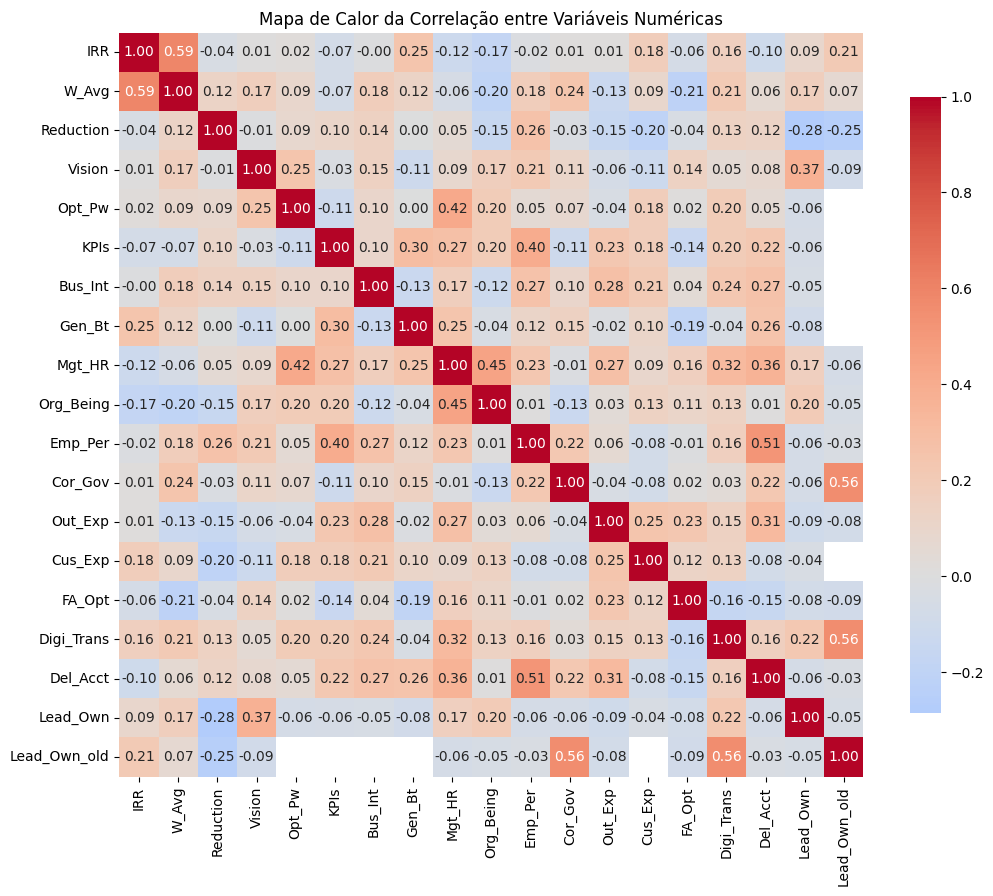

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlação das variáveis numéricas
corr_matrix = train_data[numerical_cols].corr()

# Mostrar a matriz de correlação em formato texto
print("Matriz de Correlação (valores numéricos):")
display(corr_matrix)

# Plotar heatmap da correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()

In [ ]:
# Calcular correlação das variáveis numéricas com o target
correlation_with_target = train_data[numerical_cols + ['Anomaly_label']].corr()['Anomaly_label'].drop('Anomaly_label')

# Mostrar correlações ordenadas
print("Correlação das variáveis numéricas com Anomaly_label:")
print(correlation_with_target.sort_values(ascending=False))

Correlação das variáveis numéricas com Anomaly_label:
Vision          0.644917
Mgt_HR          0.603412
Opt_Pw          0.489659
Org_Being       0.365383
Del_Acct        0.310642
Emp_Per         0.310642
Lead_Own        0.282705
Digi_Trans      0.259984
KPIs            0.250801
Gen_Bt          0.176254
W_Avg           0.148058
Out_Exp         0.076822
Bus_Int         0.054014
FA_Opt          0.015051
Cor_Gov         0.011943
Cus_Exp         0.008220
Reduction      -0.021608
IRR            -0.030947
Lead_Own_old   -0.098601
Name: Anomaly_label, dtype: float64


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd # Adicionado para carregar os dados

# Carregar os dados (garantir que train_data está disponível nesta célula)
train_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/train_data.xlsx')


# Lista das features mais relevantes (numéricas e categóricas)
# Ajuste esta lista com base na sua análise de importância das features
top_features = [
    'Vision', 'Mgt_HR', 'Opt_Pw', 'Org_Being', 'Del_Acct',
    'Emp_Per', 'Lead_Own', 'Digi_Trans', 'KPIs', 'IRR', 'W_Avg', 'Reduction' # Adicionadas algumas features com base na correlação
]

# Redefinir colunas numéricas e categóricas com base no conjunto completo de treino
# para garantir que a divisão entre numéricas e categóricas esteja correta
categorical_cols = ['company', 'fund']
drop_cols = ['id', 'id.1', 'time']
target_col = 'Anomaly_label'

numerical_cols = train_data.drop(columns=drop_cols + categorical_cols + [target_col]).columns.tolist()


# Separar colunas categóricas e numéricas dentro das top features
categorical_top = [col for col in categorical_cols if col in top_features]
numerical_top = [col for col in top_features if col in numerical_cols]

# Pré-processamento focado nas top features
# Usar as listas numerical_top e categorical_top
preprocessor_top = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), numerical_top), # Simplified for clarity, can use Pipeline if needed
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_top)
])


# Modelos para comparar
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True), # Adicionado probability=True para possível uso futuro
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42)
}

# Métrica Macro F1
f1_macro = make_scorer(f1_score, average='macro')

# Separar X e y com as top features
X = train_data[top_features]
y = train_data['Anomaly_label']

# Validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Adicionado random_state para reprodutibilidade e fechado parênteses

# Avaliar cada modelo usando validação cruzada
print("Avaliação dos modelos com as Top Features (Cross-Validation Macro F1):")
for name, model in models.items():
    # Criar pipeline com o pré-processamento das top features e o modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor_top),
        ('classifier', model)
    ])

    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=f1_macro, n_jobs=-1)
    print(f"- {name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

Avaliação dos modelos com as Top Features (Cross-Validation Macro F1):
- RandomForest: 0.8979 (+/- 0.0923)
- LogisticRegression: 0.8801 (+/- 0.0784)
- SVM: 0.9246 (+/- 0.0704)
- HistGradientBoosting: 0.3994 (+/- 0.0190)


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd # Adicionado para carregar os dados
from sklearn.pipeline import Pipeline # Adicionado para o Pipeline
from sklearn.compose import ColumnTransformer # Adicionado para ColumnTransformer
from sklearn.impute import SimpleImputer # Adicionado para SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Adicionado para StandardScaler e OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier # Adicionado
from sklearn.linear_model import LogisticRegression # Adicionado
from sklearn.svm import SVC # Adicionado

# Carregar os dados (garantir que train_data está disponível nesta célula)
train_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/train_data.xlsx')

# Definir colunas e top features (garantir que estão disponíveis nesta célula)
categorical_cols = ['company', 'fund']
drop_cols = ['id', 'id.1', 'time']
target_col = 'Anomaly_label'
numerical_cols = train_data.drop(columns=drop_cols + categorical_cols + [target_col]).columns.tolist()

# Lista das features mais relevantes (numéricas e categóricas) - Replicado para garantir disponibilidade
top_features = [
    'Vision', 'Mgt_HR', 'Opt_Pw', 'Org_Being', 'Del_Acct',
    'Emp_Per', 'Lead_Own', 'Digi_Trans', 'KPIs', 'IRR', 'W_Avg', 'Reduction'
]

# Separar colunas categóricas e numéricas dentro das top features - Replicado
categorical_top = [col for col in categorical_cols if col in top_features]
numerical_top = [col for col in top_features if col in numerical_cols]

# Pré-processamento focado nas top features (reutilizando preprocessor_top) - Replicado e ajustado
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_top = ColumnTransformer([
    ('num', numeric_transformer, numerical_top),
    ('cat', categorical_transformer, categorical_top)
])


# Definir os modelos base com os melhores parâmetros e class_weight
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
svm = SVC(random_state=42, class_weight='balanced', probability=True)

# Criar VotingClassifier (ensemble)
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('svm', svm)],
    voting='soft',  # usa probabilidades para votação ponderada
    n_jobs=-1 # Adicionado para paralelizar a avaliação
)

# Pipeline completo com pré-processamento e ensemble
pipeline_ensemble = Pipeline([
    ('preprocessor', preprocessor_top),
    ('classifier', ensemble)
])

# Dados
X = train_data[top_features]
y = train_data['Anomaly_label']

# Validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métrica Macro F1
f1_macro = make_scorer(f1_score, average='macro')

# Avaliar ensemble
scores_ensemble = cross_val_score(pipeline_ensemble, X, y, cv=cv, scoring=f1_macro, n_jobs=-1)

print(f"Ensemble Macro F1 scores: {np.round(scores_ensemble, 4)}")
print(f"Ensemble Mean Macro F1 score: {scores_ensemble.mean():.4f}")

Ensemble Macro F1 scores: [0.8992 0.8125 0.8992 1.     0.9111]
Ensemble Mean Macro F1 score: 0.9044


In [ ]:
import pandas as pd

# Criar DataFrame do array pré-processado com os nomes das features obtidos
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names_out)

In [ ]:
import pandas as pd
import numpy as np

# Treinar o pipeline completo com ensemble nos dados inteiros
pipeline_ensemble.fit(X, y)

# Extrair os modelos base do ensemble
rf_model = pipeline_ensemble.named_steps['classifier'].estimators_[0]  # Random Forest
lr_model = pipeline_ensemble.named_steps['classifier'].estimators_[1]  # Logistic Regression

# Obter importâncias das features do Random Forest
importances_rf = rf_model.feature_importances_

# Obter coeficientes do Logistic Regression
coef_lr = lr_model.coef_[0]

# Criar DataFrame para comparação
features = np.array(top_features)
df_importances = pd.DataFrame({
    'Feature': features,
    'RF_Importance': importances_rf,
    'LR_Coefficient': coef_lr
})

# Ordenar pelo impacto absoluto dos coeficientes de Logistic Regression
df_importances['LR_AbsCoeff'] = df_importances['LR_Coefficient'].abs()
df_importances = df_importances.sort_values(by='LR_AbsCoeff', ascending=False).drop(columns=['LR_AbsCoeff'])

# Mostrar tabela ordenada
print("Importância das Features no Ensemble (Random Forest e Logistic Regression):")
display(df_importances.style.format({
    'RF_Importance': '{:.4f}',
    'LR_Coefficient': '{:.4f}'
}))

Importância das Features no Ensemble (Random Forest e Logistic Regression):


,Feature,RF_Importance,LR_Coefficient
0,Vision,0.2557,1.5305
1,Mgt_HR,0.1705,1.1271
2,Opt_Pw,0.0902,0.8070
10,W_Avg,0.0981,0.5327
8,KPIs,0.0267,0.3700
4,Del_Acct,0.0396,0.3568
9,IRR,0.1239,-0.2900
11,Reduction,0.1069,-0.2871
6,Lead_Own,0.0169,0.2548
5,Emp_Per,0.0248,0.2022


In [ ]:
# Se ainda não instalou, execute esta célula uma vez:
!pip install shap

In [ ]:
# Número de colunas no array pré-processado (features)
print(f"Número de colunas em features (X_preprocessed): {X_preprocessed.shape[1]}")

# Número de valores SHAP para a classe 1 (fraude)
print(f"Tamanho do vetor shap_values[1] para a primeira amostra: {shap_values[1][0].shape[0]}")

Número de colunas em features (X_preprocessed): 12
Tamanho do vetor shap_values[1] para a primeira amostra: 2


In [ ]:
print(f"shap_values tipo: {type(shap_values)}")
print(f"shap_values length (n classes): {len(shap_values)}")

for i, sv in enumerate(shap_values):
    print(f"Classe {i} - shape: {sv.shape}")

shap_values tipo: <class 'numpy.ndarray'>
shap_values length (n classes): 60
Classe 0 - shape: (12, 2)
Classe 1 - shape: (12, 2)
Classe 2 - shape: (12, 2)
Classe 3 - shape: (12, 2)
Classe 4 - shape: (12, 2)
Classe 5 - shape: (12, 2)
Classe 6 - shape: (12, 2)
Classe 7 - shape: (12, 2)
Classe 8 - shape: (12, 2)
Classe 9 - shape: (12, 2)
Classe 10 - shape: (12, 2)
Classe 11 - shape: (12, 2)
Classe 12 - shape: (12, 2)
Classe 13 - shape: (12, 2)
Classe 14 - shape: (12, 2)
Classe 15 - shape: (12, 2)
Classe 16 - shape: (12, 2)
Classe 17 - shape: (12, 2)
Classe 18 - shape: (12, 2)
Classe 19 - shape: (12, 2)
Classe 20 - shape: (12, 2)
Classe 21 - shape: (12, 2)
Classe 22 - shape: (12, 2)
Classe 23 - shape: (12, 2)
Classe 24 - shape: (12, 2)
Classe 25 - shape: (12, 2)
Classe 26 - shape: (12, 2)
Classe 27 - shape: (12, 2)
Classe 28 - shape: (12, 2)
Classe 29 - shape: (12, 2)
Classe 30 - shape: (12, 2)
Classe 31 - shape: (12, 2)
Classe 32 - shape: (12, 2)
Classe 33 - shape: (12, 2)
Classe 34 - sha

In [ ]:
print(type(rf_model))
print(rf_model.classes_)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0 1]


In [ ]:
shap_values = explainer.shap_values(X_preprocessed)

In [ ]:
print(type(shap_values))  # Deve ser lista
print(len(shap_values))   # Deve ser 2 (classes 0 e 1)
print(shap_values[0].shape)  # (n_amostras, n_features)
print(shap_values[1].shape)  # (n_amostras, n_features)

<class 'numpy.ndarray'>
60
(12, 2)
(12, 2)


In [ ]:
print(X_preprocessed.shape)

(60, 12)


In [ ]:
X_preprocessed = X_preprocessed.T

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_preprocessed)

In [ ]:
print(shap_values[0].shape)
print(shap_values[1].shape)

(60, 2)
(60, 2)


In [ ]:
print(f"SHAP values classe 0 shape: {shap_values[0].shape}")
print(f"SHAP values classe 1 shape: {shap_values[1].shape}")

SHAP values classe 0 shape: (60, 2)
SHAP values classe 1 shape: (60, 2)


In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier # Adicionado
from sklearn.linear_model import LogisticRegression # Adicionado
from sklearn.svm import SVC # Adicionado


# --- Replicando definições e dados para garantir a execução independente ---
# Carregar os dados
train_data = pd.read_excel('/root/.cache/kagglehub/competitions/anomaly-dectection-for-financial/train_data.xlsx')

# Definir colunas e top features
categorical_cols = ['company', 'fund']
drop_cols = ['id', 'id.1', 'time']
target_col = 'Anomaly_label'
numerical_cols = train_data.drop(columns=drop_cols + categorical_cols + [target_col]).columns.tolist()

top_features = [
    'Vision', 'Mgt_HR', 'Opt_Pw', 'Org_Being', 'Del_Acct',
    'Emp_Per', 'Lead_Own', 'Digi_Trans', 'KPIs', 'IRR', 'W_Avg', 'Reduction'
]

categorical_top = [col for col in categorical_cols if col in top_features]
numerical_top = [col for col in top_features if col in numerical_cols]

# Pré-processamento focado nas top features
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_top = ColumnTransformer([
    ('num', numeric_transformer, numerical_top),
    ('cat', categorical_transformer_pipeline, categorical_top) # Usar a pipeline aqui
])

# Definir os modelos base (necessário para criar o pipeline_ensemble)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
svm = SVC(random_state=42, class_weight='balanced', probability=True)

# Criar VotingClassifier (ensemble)
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('svm', svm)],
    voting='soft',
    n_jobs=-1
)

# Pipeline completo com pré-processamento e ensemble
pipeline_ensemble = Pipeline([
    ('preprocessor', preprocessor_top),
    ('classifier', ensemble)
])

# Dados
X = train_data[top_features]
y = train_data['Anomaly_label']
# --- Fim da replicação ---


# Certifique-se que o pipeline_ensemble e os dados X, y já estão definidos e treinados
pipeline_ensemble.fit(X, y)

rf_model = pipeline_ensemble.named_steps['classifier'].estimators_[0]

X_preprocessed = pipeline_ensemble.named_steps['preprocessor'].transform(X)

# Obter os nomes das features pós-pré-processamento do pipeline ajustado
# Usar get_feature_names_out() no ColumnTransformer ajustado
feature_names_out = pipeline_ensemble.named_steps['preprocessor'].get_feature_names_out()


# Criar objeto explainer SHAP para Random Forest
explainer = shap.TreeExplainer(rf_model)

# Calcular valores SHAP
# Para classificação binária, shap_values[1] geralmente corresponde à classe positiva
shap_values = explainer.shap_values(X_preprocessed)

# Print statements to inspect shape and type of shap_values
print(f"shap_values tipo: {type(shap_values)}")
print(f"shap_values length (n classes): {len(shap_values)}")

# Check if shap_values is a list/array of arrays and print shapes of inner arrays
if isinstance(shap_values, list) or isinstance(shap_values, np.ndarray) and len(shap_values.shape) == 3:
    for i, sv in enumerate(shap_values):
        print(f"Classe {i} - shape: {sv.shape}")
else: # Handle case where it might be a single array for binary (less common with TreeExplainer)
     print(f"Shap values shape: {shap_values.shape}")


# Converter X_preprocessed para DataFrame para plots do SHAP
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names_out)


# Plotar resumo global para classe 1
plt.title("SHAP Summary Plot - Importância Global das Features (Classe 1 - Fraudulenta)")
# Pass shap_values for class 1, X_preprocessed_df, and feature_names_out
shap.summary_plot(shap_values[1], features=X_preprocessed_df, feature_names=feature_names_out)

# Plotar explicação local para a primeira amostra da classe 1
plt.title("SHAP Force Plot - Explicação Local da Primeira Amostra (Classe 1)")
# Pass expected_value for class 1, shap_values for the first sample of class 1, feature_names_out
# Note: shap.force_plot with matplotlib=True can have limitations with many features or names long.
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][0,:],
    features=X_preprocessed_df.iloc[0,:], # Use .iloc[0,:] para obter a primeira linha como Series
    feature_names=feature_names_out,
    matplotlib=True
)

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.